In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from methods.model_fitting_utilities import softmax_neg_log_likelihood
from scipy import stats
from scipy.optimize import minimize

In [34]:
summary_ta = pd.read_csv('./data/model_fitting_outputs/summary_data_fit_true.csv')
summary_ta['tag'] = 'TA'
summary_sa = pd.read_csv('./data/model_fitting_outputs/summary_data_run_inters_sparse.csv')
summary_sa['tag'] = 'SA'
summary_ca = pd.read_csv('./data/model_fitting_outputs/summary_data_run_inters.csv')
summary_ca['tag'] = 'CA'
summary_ra = pd.read_csv('./data/model_fitting_outputs/summary_data_run_random.csv')
summary_ra['tag'] = 'RA'
summary_ci = pd.read_csv('./data/model_fitting_outputs/summary_data_run_CI.csv')
summary_ci['tag'] = 'CI'
summary = pd.concat([summary_ta, summary_sa, summary_ca, summary_ra, summary_ci], axis=0)
#summary['information_gained'] = (summary['prior_entropy'] - summary['posterior_entropy']) / summary['prior_entropy']
exceptions = [
    '566feba6b937e400052d33b2', 
    '5f108dea719866356702d26f', 
    '5fbfe145e52a44000a9c2966'
]
# remove exceptions
summary = summary[~summary.pid.isin(exceptions)]

TA, model: LC_discrete_&_1, t=1.45529, p=0.14827
Entropy ratio between both condition: 2.1345197540187217 

TA, model: normative_&_1, t=1.0043, p=0.31731
Entropy ratio between both condition: 1.997915543739287 

CI, model: LC_discrete_&_1, t=1.09586, p=0.27539
Entropy ratio between both condition: 1.8623713577194874 

CI, model: normative_&_1, t=1.53962, p=0.12635
Entropy ratio between both condition: 8.592523700907963 

SA, model: LC_discrete_&_1, t=1.51898, p=0.13146
Entropy ratio between both condition: 4.55023429414925 

SA, model: normative_&_1, t=1.09452, p=0.27598
Entropy ratio between both condition: 6.655665667701533 

RA, model: LC_discrete_&_1, t=1.57802, p=0.11726
Entropy ratio between both condition: 4.287426736540146 

RA, model: normative_&_1, t=1.0812, p=0.28183
Entropy ratio between both condition: 25254955.699784853 



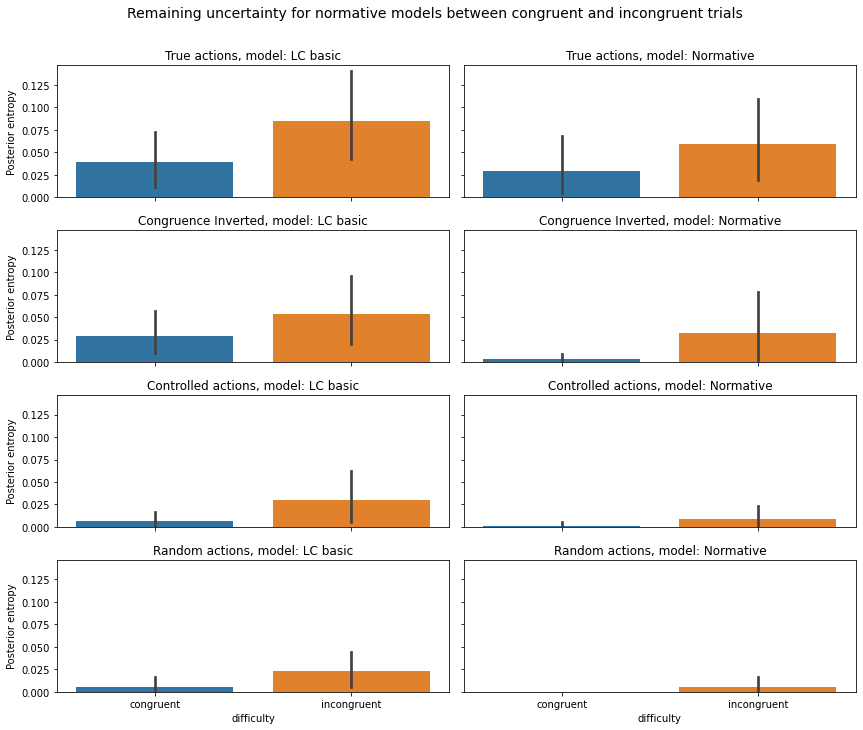

In [36]:
models = ['LC_discrete_&_1', 'normative_&_1']
model_labels = ['LC basic', 'Normative']

tags = ['TA', 'CI', 'SA', 'RA']
tags_label = ['True actions', 'Congruence Inverted', 'Controlled actions', 'Random actions']

x = 'difficulty'
y = 'posterior_entropy_unsmoothed'
y_label = 'Posterior Entropy'

summary_2 = summary[summary.experiment == 'experiment_3']
fig, axs = plt.subplots(len(tags), len(models), figsize=(12, 10), sharex=True, sharey=True)

for i, tag in enumerate(tags):
    df_tag = summary_2[summary_2.tag == tag]
    
    df_clean = df_tag[df_tag.difficulty.isin(['congruent', 'incongruent', 'implausible'])]

    for j, model in enumerate(models):
        
        df_plot = df_clean[df_clean.model_name == model]
        t, p = stats.ttest_rel(df_plot[df_plot.difficulty == 'incongruent'][y], df_plot[df_plot.difficulty == 'congruent'][y])
        print(f'{tag}, model: {model}, t={np.round(t, 5)}, p={np.round(p, 5)}')
        ratio = df_plot[df_plot.difficulty == 'incongruent'][y].mean() / df_plot[df_plot.difficulty == 'congruent'][y].mean()
        print(f'Entropy ratio between both condition: {ratio} \n')
        sns.barplot(x=x, y=y, data=df_plot, ax=axs[i, j])

        if j > 0:
            axs[i, j].set_ylabel('')
        else:
            axs[i, j].set_ylabel('Posterior entropy')

        if i < len(tags) - 1:
            axs[i, j].set_xlabel('')

        axs[i, j].set_title(f'{tags_label[i]}, model: {model_labels[j]}')


fig.suptitle('Remaining uncertainty for normative models between congruent and incongruent trials', fontsize=14, y=1.01)
plt.tight_layout()



In [ ]:
models = ['LC_discrete_&_1', 'normative_&_1']

tags = ['TA', 'SA', 'CA', 'RA']

x = 'difficulty'
y = 'posterior_entropy_unsmoothed'
y_label = 'Posterior Entropy'

summary_2 = summary[summary.experiment == 'experiment_3']
fig, axs = plt.subplots(len(tags), len(models), figsize=(20, 10), sharex=True, sharey=True)

for i, tag in enumerate(tags):
    df_tag = summary_2[summary_2.tag == tag]
    
    df_clean = df_tag[df_tag.difficulty.isin(['congruent', 'incongruent', 'implausible'])]

    for j, model in enumerate(models):
        #t, p = stats.ttest_ind()
        df_plot = df_clean[df_clean.model_name == model]
        sns.histplot(df_plot[df_plot.difficulty == 'incongruent'][y], ax=axs[i, j])

        if j > 0:
            axs[i, j].set_ylabel('')
        else:
            axs[i, j].set_ylabel('')

        if i < len(tags) - 1:
            axs[i, j].set_xlabel('')

        axs[i, j].set_title('')

plt.tight_layout()

KeyboardInterrupt: 

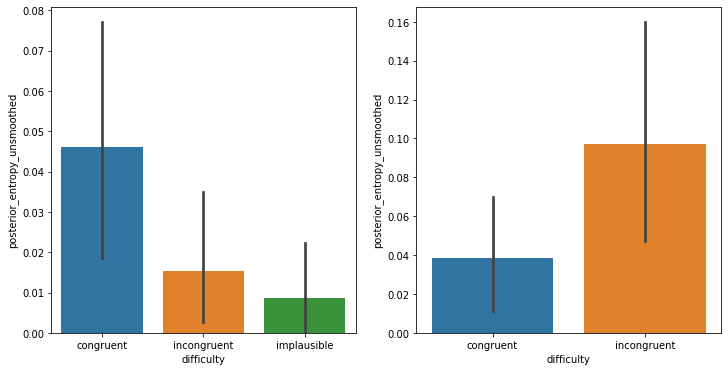

In [ ]:
x = 'difficulty'
y = 'posterior_entropy_unsmoothed'

experiments = ['experiment_2', 'experiment_3']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, experiment in enumerate(experiments):
    df_plot = df_norm_label[df_norm_label.experiment == experiment]
    sns.barplot(x=x, y=y, data=df_plot, ax=axs[i])


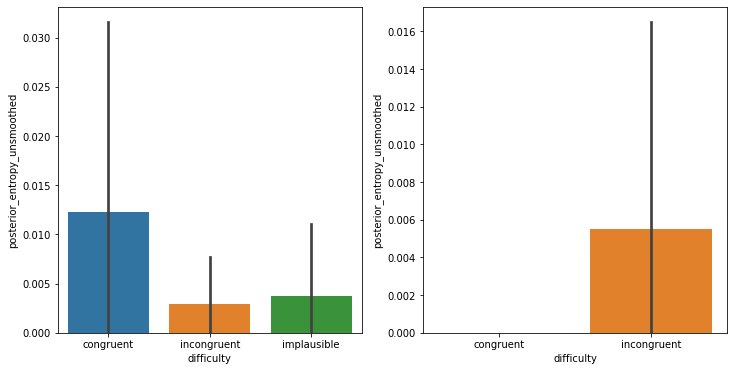

In [ ]:
summary = pd.read_csv('./data/model_fitting_outputs/summary_data_run_random.csv')
summary['information_gained'] = (summary['prior_entropy'] - summary['posterior_entropy']) / summary['prior_entropy']

df_norm = summary[summary.model_name == 'normative_&_1']

df_norm_label = df_norm[df_norm.difficulty.isin(['congruent', 'incongruent', 'implausible'])]

x = 'difficulty'
y = 'posterior_entropy_unsmoothed'

experiments = ['experiment_2', 'experiment_3']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i, experiment in enumerate(experiments):
    df_plot = df_norm_label[df_norm_label.experiment == experiment]
    sns.barplot(x=x, y=y, data=df_plot, ax=axs[i])
